# Vehicle Detection

## Imports

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Color Histogram

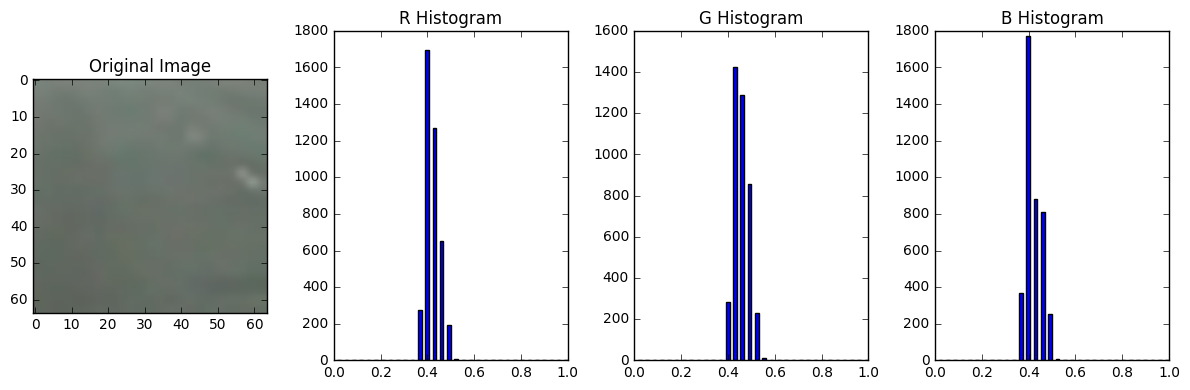

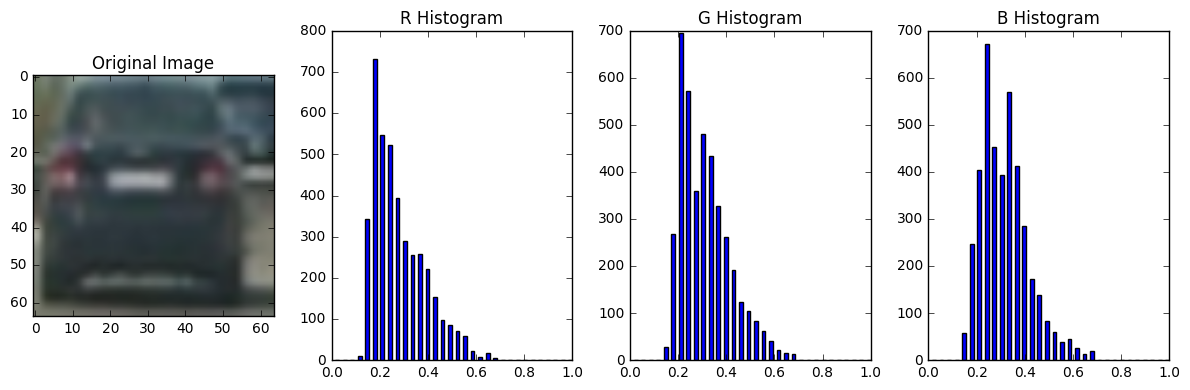

In [12]:
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 1)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)

    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges) - 1]) / 2

    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))

    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features

def plot_color_hist(img):
    image = mpimg.imread(img)
    rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 1))
    
    bar_width = 1 / 64
    
    fig = plt.figure(figsize=(12,4))
    plt.subplot(141)
    plt.title("Original Image")
    plt.imshow(image)
    plt.subplot(142)
    plt.bar(bincen, rh[0], bar_width)
    plt.xlim(0, 1)
    plt.title("R Histogram")
    plt.subplot(143)
    plt.bar(bincen, gh[0], bar_width)
    plt.xlim(0, 1)
    plt.title("G Histogram")
    plt.subplot(144)
    plt.bar(bincen, bh[0], bar_width)
    plt.xlim(0, 1)
    plt.title("B Histogram")
    fig.tight_layout()
    plt.show()

plot_color_hist("non-vehicles/GTI/image1.png")
plot_color_hist("vehicles/GTI_middleclose/image0000.png")

## Bin Spatial

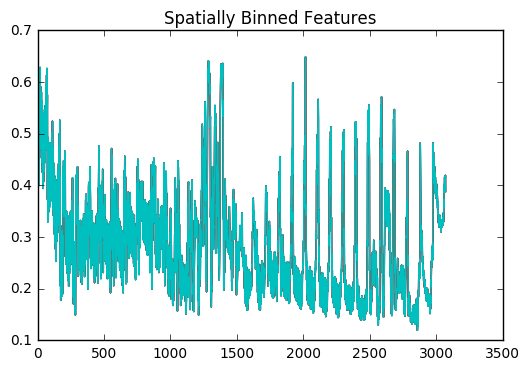

In [19]:
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    else: feature_image = np.copy(img)

    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 

    # Return the feature vector
    return features

image = mpimg.imread("vehicles/GTI_middleclose/image0000.png")
feature_vec = bin_spatial(image, color_space='RGB', size=(32, 32))

# Plot features
plt.plot(feature_vec)
plt.title('Spatially Binned Features')
plt.show()